In [4]:
import numpy as np
import pandas as pd

df=pd.read_csv('./data.csv', encoding='shift_jis', header=2)
df

,年,月,日,時,天気,気温(℃)
0,2020,8,1,1,NaN,24.2
1,2020,8,1,2,NaN,24.2
2,2020,8,1,3,10.0,23.9
3,2020,8,1,4,NaN,23.2
4,2020,8,1,5,NaN,22.0
...,...,...,...,...,...,...
739,2020,8,31,20,NaN,24.7
740,2020,8,31,21,4.0,24.5
741,2020,8,31,22,NaN,24.1
742,2020,8,31,23,NaN,23.4


## 欠損値がある行を削除する

In [5]:
df.dropna(how='any', inplace=True)
df

,年,月,日,時,天気,気温(℃)
2,2020,8,1,3,10.0,23.9
5,2020,8,1,6,4.0,22.6
8,2020,8,1,9,2.0,26.9
11,2020,8,1,12,2.0,30.6
14,2020,8,1,15,2.0,29.7
...,...,...,...,...,...,...
728,2020,8,31,9,4.0,27.4
731,2020,8,31,12,4.0,31.3
734,2020,8,31,15,2.0,30.6
737,2020,8,31,18,4.0,26.1


## 天気番号の対応表を用意(これは定義なので固定)

In [6]:
tenkinb=pd.Series(np.arange(1,25))
tenki=pd.Series(['快晴', '晴れ', '薄曇', '曇', '煙霧', '砂じん嵐', '地ふぶき', '霧', '霧雨', '雨', 'みぞれ', '雪', 'あられ', 'ひょう', '雷', 'しゅう雨または止み間のある雨', '着氷性の雨', '着氷性の霧雨', 'しゅう雪または止み間のある雪', '霧雪', '凍雨', '細氷', 'もや', '降水またはしゅう雨性の降水'])
df_tenki = pd.DataFrame({'天気' : tenkinb, '天候' : tenki})
df_tenki

,天気,天候
0,1,快晴
1,2,晴れ
2,3,薄曇
3,4,曇
4,5,煙霧
5,6,砂じん嵐
6,7,地ふぶき
7,8,霧
8,9,霧雨
9,10,雨


## 天気番号の対応表を結合することで天候の列を元のdataframeに追加する

In [7]:
df_sum=pd.merge(df, df_tenki, on='天気')
df_sum

,年,月,日,時,天気,気温(℃),天候
0,2020,8,1,3,10.0,23.9,雨
1,2020,8,13,18,10.0,27.0,雨
2,2020,8,16,18,10.0,32.0,雨
3,2020,8,22,21,10.0,27.6,雨
4,2020,8,23,6,10.0,25.7,雨
...,...,...,...,...,...,...,...
212,2020,8,22,18,3.0,30.3,薄曇
213,2020,8,23,18,3.0,25.8,薄曇
214,2020,8,29,21,3.0,28.7,薄曇
215,2020,8,31,6,3.0,27.5,薄曇


## 時間ごとの天候の割合("時"と"天候"のクロス集計)

In [8]:
pd.crosstab(df_sum['時'],df_sum['天候'], normalize='index', margins=True)

天候,快晴,晴れ,曇,薄曇,雨,雷
時,,,,,,
3,0.161290,0.516129,0.193548,0.096774,0.032258,0.000000
6,0.129032,0.419355,0.322581,0.096774,0.032258,0.000000
9,0.032258,0.645161,0.225806,0.096774,0.000000,0.000000
12,0.129032,0.612903,0.129032,0.096774,0.032258,0.000000
15,0.193548,0.548387,0.096774,0.096774,0.032258,0.032258
18,0.129032,0.483871,0.129032,0.193548,0.064516,0.000000
21,0.096774,0.516129,0.225806,0.096774,0.064516,0.000000
All,0.124424,0.534562,0.188940,0.110599,0.036866,0.004608


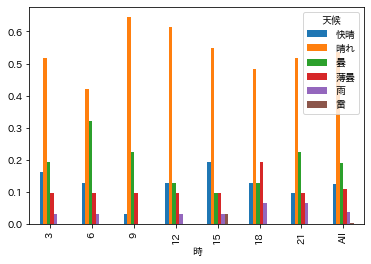

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
import japanize_matplotlib

# 時間と天候でクロス集計、列で正規化
tmp=pd.crosstab(df_sum['時'],df_sum['天候'], normalize='index', margins=True)

tmp.plot(kind='bar')
plt.show()

In [16]:
tmp=pd.crosstab(df_sum['時'],df_sum['天候'], normalize='index', margins=True)

In [11]:
tmp2=pd.crosstab(df_sum['時'], df_sum['天候'], values=df['気温(℃)'], aggfunc='mean')
tmp2

天候,快晴,晴れ,曇,薄曇,雨
時,,,,,
3,27.30,28.700000,26.266667,NaN,NaN
6,NaN,29.757143,29.000000,NaN,NaN
9,NaN,26.750000,25.833333,24.15,NaN
12,28.90,28.222222,NaN,33.70,NaN
15,28.55,29.887500,NaN,NaN,22.6
18,31.40,28.300000,29.700000,29.45,23.9
21,26.00,28.250000,23.300000,31.75,NaN


In [12]:
tmp2.mean(axis='columns')

時
3     27.422222
6     29.378571
9     25.577778
12    30.274074
15    27.012500
18    28.550000
21    27.325000
dtype: float64

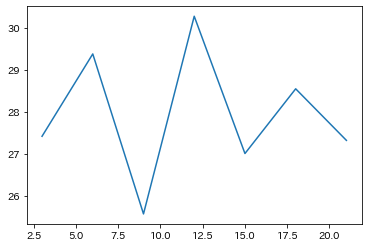

In [13]:
plt.plot(tmp2.mean(axis='columns'))
plt.show()

In [15]:
tmp2.mean(axis='index')

天候
快晴    28.430000
晴れ    28.552409
曇     26.820000
薄曇    29.762500
雨     23.250000
dtype: float64

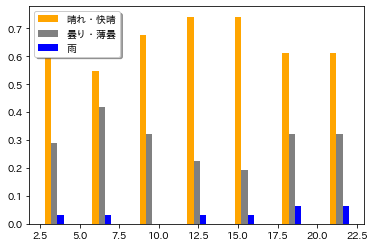

In [17]:
width = 0.4

g1=plt.bar(np.array(tmp.index[0:7]),tmp['晴れ'][0:7]+tmp['快晴'][0:7], color='orange', width = width, label='晴れ・快晴')
g2=plt.bar(np.array(tmp.index[0:7])+width,tmp['曇'][0:7]+tmp['薄曇'][0:7], color='gray', width = width, label='曇り・薄曇')
g3=plt.bar(np.array(tmp.index[0:7])+width*2,tmp['雨'][0:7], color='blue', width = width, label='雨')
plt.legend(handles=[g1,g2,g3],loc='best',shadow=True)
plt.show()